<a href="https://colab.research.google.com/github/Udit-Kalra-1117/PCA-Red-Wine-Qualtiy-CSV/blob/main/PCA_Udit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv(r"/content/winequality-red.csv",sep=";")

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = data.loc[:,'fixed acidity':'alcohol']
y = data['quality']

In [ ]:
X.columns #Predictor variables

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
y.name #Target variable

'quality'

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
print('Mean of each variable:')
print(scaler.mean_)
print('\nStd of each variable:')
print(scaler.scale_)

Mean of each variable:
[ 8.31963727  0.52782051  0.27097561  2.5388055   0.08746654 15.87492183
 46.46779237  0.99674668  3.3111132   0.65814884 10.42298311]

Std of each variable:
[1.74055180e+00 1.79003704e-01 1.94740214e-01 1.40948711e+00
 4.70505826e-02 1.04568856e+01 3.28850367e+01 1.88674370e-03
 1.54338181e-01 1.69453967e-01 1.06533430e+00]


In [ ]:
X = scaler.transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA() # creates an instance of PCA class
results = pca.fit(X) # applies PCA on predictor variables
Z = results.transform(X) # create a new array of latent variables

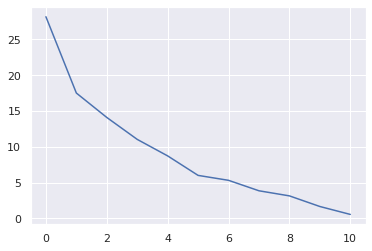

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.plot(results.explained_variance_ratio_*100) # scree plot
plt.show()

In [ ]:
pd.DataFrame(results.components_)

,0,1,2,3,4,5,6,7,8,9,10
0,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
1,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
2,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
3,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
4,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681
5,0.101479,0.411449,0.069593,0.049156,0.304339,-0.014000,0.136308,-0.391152,-0.522116,-0.381263,0.361645
6,-0.350227,-0.533735,0.105497,0.290663,0.370413,-0.116596,-0.093662,-0.170481,-0.025138,-0.447469,-0.327651
7,-0.177595,-0.078775,-0.377516,0.299845,-0.357009,-0.204781,0.019036,-0.239223,-0.561391,0.374604,-0.217626
8,-0.194021,0.129110,0.381450,-0.007523,-0.111339,-0.635405,0.592116,-0.020719,0.167746,0.058367,-0.037603
9,-0.249523,0.365925,0.621677,0.092872,-0.217671,0.248483,-0.370750,-0.239990,-0.010970,0.112320,-0.303015


In [ ]:
pd.DataFrame(Z[:,:6], columns=list(
[u'Acidity', u'Sulfides', u'More alcohol', u'Chlorides', u'More residual sugar', u'Less pH'])).head(10)

,Acidity,Sulfides,More alcohol,Chlorides,More residual sugar,Less pH
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921
5,-1.583707,0.569195,-1.538286,0.023750,-0.110076,-0.993626
6,-1.101464,0.608015,-1.075915,-0.343959,-1.133382,0.175000
7,-2.248708,-0.416835,-0.986837,-0.001203,-0.780435,0.286057
8,-1.086887,-0.308569,-1.518150,0.003315,-0.226727,-0.512634
9,0.654790,1.665207,1.209476,-0.824635,1.718501,-0.476497


In [ ]:
#Using all 11 variables
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)
pred = neigh.predict(X)
print('Confusion matrix:')
print(confusion_matrix(pred,y))
print('\nAccuracy:')
print(accuracy_score(pred,y))

Confusion matrix:
[[  6   5   2   0   0   0]
 [  0  18  10  13   0   0]
 [  2  17 589  87  18   2]
 [  2  12  75 511  36   7]
 [  0   1   4  27 144   7]
 [  0   0   1   0   1   2]]

Accuracy:
0.7942464040025016


In [ ]:
#Using only 6 variables
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Z[:,:6],y)
pred = neigh.predict(Z[:,:6])
print('Confusion matrix:')
print(confusion_matrix(pred,y))
print('\nAccuracy:')
print(accuracy_score(pred,y))

Confusion matrix:
[[  7   4   5   1   0   0]
 [  0  18  11  11   3   0]
 [  2  16 584  92  26   4]
 [  1  14  75 507  37   6]
 [  0   1   6  27 132   5]
 [  0   0   0   0   1   3]]

Accuracy:
0.7823639774859287
